In [1]:
import pandas as pd

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

In [2]:
PATH = 'data/FantasyAI'
data = pd.read_feather(f'{PATH}/processed_data.feather')
data.head()

,position,season,fpts,firstname,college,seasonweek,playerID,height,experience,weight,...,tar,target_share,tkl,yac,tm_airyards,tot,tot_score,trcv,wopr,yds
0,QB,2012,12.52,Eli,Mississippi,1,00-0022803,195,10,99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TE,2012,10.00,Martellus,Texas A&M,1,00-0026201,198,6,124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,WR,2012,5.80,Victor,Massachusetts,1,00-0027265,182,3,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DE,2012,0.00,Jason,South Florida,1,00-0027867,195,4,124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DT,2012,1.00,Linval,East Carolina,1,00-0027885,193,4,149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Final Processing

In [4]:
cont_vars = ['air_yards', 'ast', 'aypt', 'ffum', 'k_xpb', 'k_xpmade',
            'k_xpmissed', 'k_xptot', 'int', 'k_fga', 'k_fgm', 'k_fgyds', 
            'k_xpa', 'k_totpfg', 'kret_avg', 'kret_lng', 'kret_lngtd', 'kret_ret', 'kret_tds', 'lost', 'ms_air_yards', 'p_avg', 'p_i20',
            'p_lng', 'pass_twopta', 'pass_twoptm', 'pass_cmp', 'pass_ints', 'pass_tds',
            'pass_att', 'p_yds', 'p_pts', 'pass_yds', 'pret_avg', 'pret_lng', 'pret_lngtd',
            'pret_ret', 'pret_tds', 'pts_allwd', 'racr', 'rcv', 'rcv_lng', 'rcv_lngtd',
            'rcv_rec', 'rcv_tds', 'rcv_twopta', 'rcv_twoptm', 'rcv_yds', 'rush_att',
            'rush_lng', 'rush_lngtd', 'rush_tds', 'rush_twopta', 'rush_twoptm',
            'rush_yds', 'sk', 'tar', 'target_share', 'tkl', 'yac', 'tm_airyards', 
            'tot', 'tot_score', 'trcv', 'wopr', 'yac', 'yds']
cat_vars = set(data.columns) - set(cont_vars)
cat_vars.discard('fpts')
cat_vars = list(cat_vars)
cat_vars

['position',
 'experience',
 'number',
 'name',
 'seasonweek',
 'lastname',
 'day',
 'full_name',
 'season',
 'team',
 'college',
 'weekday',
 'height',
 'weight',
 'home',
 'age',
 'opponent',
 'playerID',
 'away',
 'year',
 'firstname',
 'month']

In [5]:
for v in cat_vars: data[v] = data[v].astype('category').cat.as_ordered()

In [6]:
delete = ['firstname', 'lastname', 'playerID', 'name']
for d in delete:
    del data[d]
    cat_vars.remove(d)

In [7]:
index = 1
players = list(data.full_name)
pID = {}
for p in players:
    i = pID.setdefault(p,index)
    if i == index:
        index += 1
Conversion = [pID[x] for x in players]
data.full_name = Conversion
data.full_name = data.full_name.astype('category')

In [8]:
'''split in training and test data'''
test_data = data[data.season == 2017]
test_data = test_data[test_data.seasonweek > 14].copy()
len(test_data)

2576

In [9]:
max = test_data.index[0]
training_data = data.iloc[0:max,:]
len(training_data)

56132

In [10]:
df, y, nas, mapper = proc_df(training_data, 'fpts', do_scale=True)

In [11]:
df_test, _, nas, mapper = proc_df(test_data, 'fpts', do_scale=True,
                                  mapper=mapper, na_dict=nas)

In [12]:
df.head()

,position,season,college,seasonweek,height,experience,weight,full_name,year,day,...,tar,target_share,tkl,yac,tm_airyards,tot,tot_score,trcv,wopr,yds
0,18,1,131,1,12,14,28,1,1,5,...,-0.439129,-0.442168,-0.762284,-0.393913,-0.516964,-0.263906,-2.147822,-0.289801,-0.430113,-0.062404
1,22,1,224,1,13,10,53,2,1,5,...,-0.439129,-0.442168,-0.762284,-0.393913,-0.516964,-0.263906,-2.147822,-0.289801,-0.430113,-0.062404
2,23,1,120,1,7,7,20,3,1,5,...,-0.439129,-0.442168,-0.762284,-0.393913,-0.516964,-0.263906,-2.147822,-0.289801,-0.430113,-0.062404
3,4,1,204,1,12,8,53,4,1,5,...,-0.439129,-0.442168,-0.762284,-0.393913,-0.516964,-0.263906,-2.147822,-0.289801,-0.430113,-0.062404
4,5,1,61,1,11,8,78,5,1,5,...,-0.439129,-0.442168,-0.762284,-0.393913,-0.516964,-0.263906,-2.147822,-0.289801,-0.430113,-0.062404


In [13]:
validation = data[data.season == 2017]
validation = validation[validation.seasonweek > 8]
val_idx = np.array(validation[validation.seasonweek <= 14].index)
val_idx

array([51361, 51362, 51363, 51364, 51365, 51366, 51367, 51368, 51369, 51370, 51371, 51372, 51373, 51374,
       51375, 51376, 51377, 51378, 51379, 51380, ..., 56112, 56113, 56114, 56115, 56116, 56117, 56118, 56119,
       56120, 56121, 56122, 56123, 56124, 56125, 56126, 56127, 56128, 56129, 56130, 56131], dtype=int64)

# DL

In [14]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y, cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [15]:
cat_sz = [(c, len(data[c].cat.categories)+1) for c in cat_vars]

In [16]:
cat_sz

[('position', 24),
 ('experience', 28),
 ('number', 100),
 ('seasonweek', 18),
 ('day', 32),
 ('full_name', 1891),
 ('season', 7),
 ('team', 36),
 ('college', 270),
 ('weekday', 6),
 ('height', 17),
 ('weight', 89),
 ('home', 3),
 ('age', 26),
 ('opponent', 36),
 ('away', 3),
 ('year', 7),
 ('month', 6)]

In [17]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [18]:
emb_szs

[(24, 12),
 (28, 14),
 (100, 50),
 (18, 9),
 (32, 16),
 (1891, 50),
 (7, 4),
 (36, 18),
 (270, 50),
 (6, 3),
 (17, 9),
 (89, 45),
 (3, 2),
 (26, 13),
 (36, 18),
 (3, 2),
 (7, 4),
 (6, 3)]

In [23]:
#def inv_y(a): return np.exp(a)

def exp_rmse(y_pred, targ):
    pct_var = (targ - y_pred)
    return math.sqrt((pct_var**2).mean())

max_y = np.max(y)
y_range = (0, 100)
print(y_range)

(0, 100)


In [24]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [25]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                                                                              
    0      42.887535  36.269299 



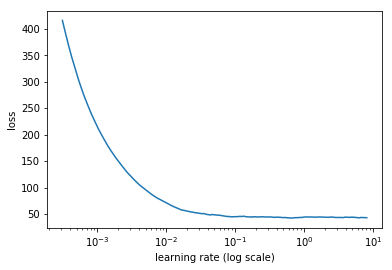

In [26]:
m.sched.plot(100)

In [27]:
m.fit(lr, 3, metrics=[exp_rmse])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmse                                                                   
    0      42.442696  36.251869  5.99494   
    1      42.071695  33.586975  5.768747                                                                   
    2      14.870518  14.018553  3.727132                                                                   



[14.018553, 3.72713244563215]

In [29]:
m.fit(lr, 5, metrics=[exp_rmse], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmse                                                                   
    0      11.224967  12.753532  3.558746  
    1      10.354546  12.907241  3.582119                                                                   
    2      10.0125    12.830835  3.570184                                                                   
    3      9.179038   13.168086  3.617723                                                                   
    4      9.040635   13.289363  3.634851                                                                   



[13.289363, 3.6348512795163654]

In [30]:
m.save('first_try')